(c_vectors)=

---
```{admonition} Learning Objectives
* Understand the role of GeoPandas in manipulating spatial data in Python.
* Learn how to create and use Geopandas GeoSeries and GeoDataFrame.
* Visualize spatial vector data using basic plotting.
```
```{admonition} Review
* [Fundamentals of Spatial Data Structures](c_features.md)
```
---

# Working with Spatial Vector Data using GeoPandas 

Previously, we explored the fundamentals of spatial data structures [here](c_features.md). Now, we will delve deeper into the manipulation of spatial vector data, using the GeoPandas library. GeoPandas serves as an essential tool for working with geospatial data in Python, seamlessly blending the data manipulation capabilities of pandas with the geometric data analysis power of shapely. As a result, GeoPandas provides a high-level interface for intricate geospatial operations, effectively bypassing the need for a specialized spatial database like PostGIS.

## Data Structures in GeoPandas

GeoPandas introduces two primary data structures, namely, `GeoSeries` and `GeoDataFrame`. These structures are subclasses of the pandas Series and DataFrame respectively.

### GeoSeries

A `GeoSeries` is akin to a vector where each entry represents a set of geometric shapes corresponding to a single observation. This could be a single shape (like a single polygon), or it could involve multiple shapes that form one observation (for instance, the numerous islands that compose the State of Hawaii or a country like Indonesia).

GeoPandas supports three basic types of geometric objects, all of which are shapely objects:

* Points / Multi-Points
* Lines / Multi-Lines
* Polygons / Multi-Polygons

Here are examples of each type:

The first example creates a GeoSeries of Points. This might be used to represent individual locations on a map. For instance, you could use a Point for each location where a sample was collected, or to mark the location of cities or other points of interest.

In [1]:
# Point GeoSeries
import geopandas
from shapely.geometry import Point
s = geopandas.GeoSeries([Point(1, 1), Point(2, 2), Point(3, 3)])
s

0    POINT (1 1)
1    POINT (2 2)
2    POINT (3 3)
dtype: geometry

The next example creates a GeoSeries of Lines. Lines could be used to represent the path of a moving object, the route of a road or river, or the border between different regions. The example creates a single line that connects three points.

In [2]:
# Line GeoSeries
from shapely.geometry import LineString
l = geopandas.GeoSeries([LineString([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])])
l

0    LINESTRING (-77.03687 38.90719, -76.61219 39.2...
dtype: geometry

The last example creates a GeoSeries of Polygons. A Polygon might represent a bounded area, such as the outline of a lake, the footprint of a building, or the boundaries of a country. In this example, the polygon represents an area defined by three points (a triangle).

In [3]:
# Polygon GeoSeries
from shapely.geometry import Polygon
p = geopandas.GeoSeries([Polygon([Point(-77.036873,38.907192), Point(-76.612190,39.290386,), Point(-77.408456,39.412006)])])
p

0    POLYGON ((-77.03687 38.90719, -76.61219 39.290...
dtype: geometry

While a `GeoSeries` can contain different types of geometric objects, not all operations will be possible if the GeoSeries is mixed. Certain methods require all objects in the GeoSeries to be of the same geometric type.

### GeoDataFrame

A `GeoDataFrame` is a table-like data structure that holds a `GeoSeries`. 

One `GeoSeries` column in a `GeoDataFrame` holds a special status and is referred to as the `GeoDataFrame’s` "geometry". Any spatial method applied to a `GeoDataFrame`, or when a spatial attribute like the area is called, they will act on this "geometry" column. 

Regardless of its actual column name, the "geometry" column can be accessed via the geometry attribute (gdf.geometry), and the name of the geometry column can be retrieved by calling gdf.geometry.name.

```{note}
While a `GeoDataFrame` may contain multiple columns with geometric (shapely) objects, only one column can be considered the active geometry at a time. To switch the active geometry column, you can use the `GeoDataFrame.set_geometry()` method.
```

Here is an example of a `GeoDataFrame` using the 'naturalearth_lowres' dataset. This dataset represents a simplified global country boundary map, which can be useful for global scale visualizations:

In [4]:
# Load a GeoDataFrame
world = geopandas.read_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_admin_0_sovereignty.geojson')

# Preview the data
world.head()

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 sovereignty,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
1,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
2,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 sovereignty,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."
3,3,6,Andorra,AND,0,2,Sovereign country,Andorra,AND,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,5,1,Admin-0 sovereignty,"POLYGON ((1.70605 42.50332, 1.67852 42.49668, ..."
4,1,4,United Arab Emirates,ARE,0,2,Sovereign country,United Arab Emirates,ARE,0,...,Asia,Western Asia,Middle East & North Africa,20,20,6,-99,1,Admin-0 sovereignty,"MULTIPOLYGON (((53.92783 24.1772, 53.92812 24...."


And now let's create a simple plot from this `GeoDataFrame`:

<Axes: >

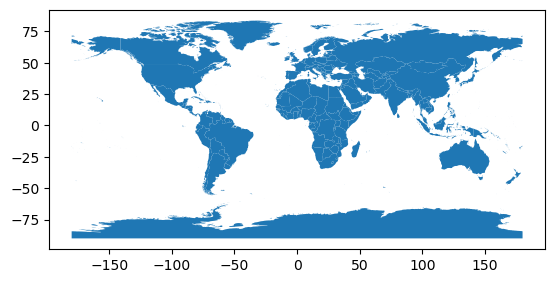

In [5]:
# Plot the GeoDataFrame
world.plot()

The resulting plot shows the geographic locations of all countries in the 'naturalearth_lowres' dataset.